<a href="https://colab.research.google.com/github/amanjain487/learning_CV/blob/main/1%20Highlight%20Lanes%20in%20Road/1%20-%20Using%20Hough%20Transform%20-%20Highlight%20Only%20Lanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Highlighting Lane in Road Image

Steps:
1. Detect Edges.
2. Find Straight Lines.

# 1. Detect Edges


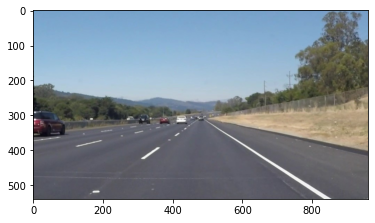

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# open image
image = cv2.imread('highlight Lane.png')

# opencv opens image in BGR format by default
# convert BGR to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot and display the image
plt.imshow(rgb)
plt.show()

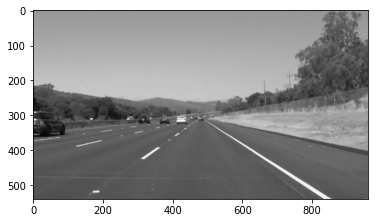

In [28]:
# convert to grayscale image
gray_image = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

# plot and display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.show()

[[167 162 156 ... 156 161 167]
 [161 159 156 ... 155 158 160]
 [155 154 154 ... 153 153 154]
 ...
 [108  99  88 ...  92 102 110]
 [128 116  99 ... 104 119 130]
 [142 128 107 ... 113 131 143]]


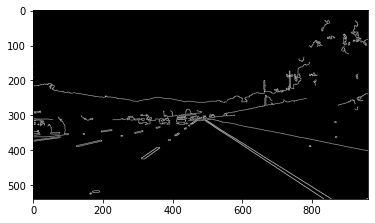

In [33]:
# define kernel size for blurring the image
kernel_size = 3

# apply gaussian blur
blur_gray = cv2.GaussianBlur(gray_image,(kernel_size, kernel_size), 0)

# detect edges using Canny method which 1st applies Sobel Edge detecting kernels
# and then does non-max suppression
edges = cv2.Canny(blur_gray, 50, 200)

# plot and dsiplay the edges
plt.imshow(edges, cmap='Greys_r')
plt.show()

# 2. Find Straight Lines

```
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
```

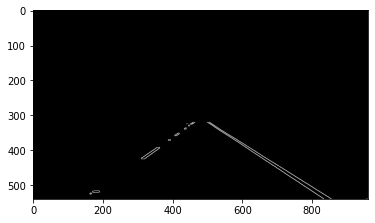

In [87]:
# create a mask image same as edges image size but all values 0
mask = np.zeros_like(edges)   
mask_color = 255   

# define a four sided polygon to mask
# this polygon tells which are to extract
# only the are covered by this polygon will be considered 
# for finding straight lines using Hough Transform
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 320), (imshape[1]-450, 320), (imshape[1],imshape[0])]], dtype=np.int32)

# fill the above defined polygon with 255
# mask image is of size edge image
# all pixels were initially zero
# now all pixels that belong in the area of polygon described above will be 255
cv2.fillPoly(mask, vertices, mask_color)

# do bitwise and with edges image and mask image
# this will remove all the unnecessary 255 pixel values from mask image 
# and only keep edges that are there in above defined polygon area
masked_edges = cv2.bitwise_and(edges, mask)

# plot and display the masked_edges
plt.imshow(masked_edges, cmap='Greys_r')
plt.show()

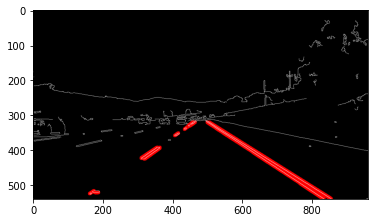

In [88]:
# Define the Hough transform parameters
rho = 1 # distance resolution in pixels of the Hough grid 
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell) 
min_line_length = 10 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments

# blank image in which straight lines will be drawn
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
# stack 3 gray images on one another to get 3 same channels 
# but since it is 3 channels, it can be considered as color image
# we need this color image, because image in which red line drawn above is actually color image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
# Since we are adding 2 images, they both have to be of the same size and type.
# we do weighted sum here, 80% weightage of red color lines and 100% of edges
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()